# Exploratory Data Analysis on Stack Overflow dataset

Lets Start by importing all the essential python libraries.

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings  
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
warnings.filterwarnings("ignore")

In [3]:
survey_raw_df = pd.read_csv('./survey_results_public.csv')

### Read the dataset in dataframe

In [4]:
survey_raw_df.head(3)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN


### Read all the columns of dataframe

In [5]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [6]:
schema_fname = './survey_results_schema.csv'
pd.read_csv(schema_fname)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


Set the Column as index

In [7]:
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

In [8]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

### As we set the column as index we get retrieve text with our index values..

In [9]:
schema_raw['Hobbyist']

'Do you code as a hobby?'

We will now select columns we find relevant to analyze more...

In [11]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',

    # Programming experience
    'Hobbyist',

    # Employment
    'Employment',
    'DevType',

]

In [12]:
survey_df = survey_raw_df[selected_columns].copy()  #make a copy of your dataframe

In [13]:
schema = schema_raw[selected_columns] #get schema of only our selected columns

In [ ]:
survey_df.shape  #see the shape of our dataframe

(64461, 7)

In [14]:
survey_df.info()  #See the datatypes of our columns selected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     5573 non-null   object 
 1   Age         4888 non-null   float64
 2   Gender      5311 non-null   object 
 3   EdLevel     5461 non-null   object 
 4   Hobbyist    5573 non-null   object 
 5   Employment  5551 non-null   object 
 6   DevType     4839 non-null   object 
dtypes: float64(1), object(6)
memory usage: 304.9+ KB


In [15]:
survey_df.describe() #get more statistical info of our data

,Age
count,4888.000000
mean,32.841039
std,10.566974
min,11.000000
25%,25.000000
50%,31.000000
75%,38.000000
max,99.000000


We will now drop columns where we see Age is less than 10 or more than 100 

In [ ]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

## Now let us start analyzing in detail -

In [16]:
survey_df['Gender'].value_counts()

Man                                                            4913
Woman                                                           337
Non-binary, genderqueer, or gender non-conforming                37
Woman;Non-binary, genderqueer, or gender non-conforming          12
Man;Non-binary, genderqueer, or gender non-conforming             7
Woman;Man                                                         4
Woman;Man;Non-binary, genderqueer, or gender non-conforming       1
Name: Gender, dtype: int64

Import NumPy for faster Numerical Computing


In [17]:
import numpy as np


# Data Cleaning 

In [19]:
survey_df.where(~(survey_df.Gender.str.contains(';',na=False)),np.nan,inplace=True) # Select gender where only one option is selected for simplicity

In [21]:
survey_df.sample(10)  #Get a random sample to know your data

,Country,Age,Gender,EdLevel,Hobbyist,Employment,DevType
591,United States,38.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Yes,Employed full-time,"Database administrator;Developer, back-end;Dev..."
2256,United States,35.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",No,Employed full-time,"Data or business analyst;Designer;Developer, b..."
1164,United States,40.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Yes,Employed full-time,Data or business analyst;Data scientist or mac...
2822,Mexico,44.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",No,Employed full-time,"Developer, back-end"
4032,Germany,41.0,Man,"Secondary school (e.g. American high school, G...",Yes,"Independent contractor, freelancer, or self-em...","Developer, full-stack"
4523,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Yes,Employed full-time,"Developer, back-end;DevOps specialist;Engineer..."
3912,Belarus,27.0,Man,"Associate degree (A.A., A.S., etc.)",No,Employed full-time,"Developer, full-stack"
5468,United States,38.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Yes,Employed full-time,"Developer, full-stack"
2738,Belarus,19.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Yes,"Not employed, but looking for work","Designer;Developer, back-end;Developer, front-..."
4698,Canada,37.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Yes,Employed full-time,"Developer, back-end;Developer, full-stack"


In [23]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  4913
Woman                                                 337
Non-binary, genderqueer, or gender non-conforming      37
Name: Gender, dtype: int64

### Compare survey responses and preferrences across genders , how do the relative education levels differ across genders

In [24]:
ed_for_man = survey_df['Employment'].where(survey_df.Gender== 'Man').sort_values(ascending = False)

### Get the value count for the type of employment for Men


In [ ]:
ed_for_man.value_counts(dropna = False)

Employed full-time                                      32660
NaN                                                     18601
Student                                                  5499
Independent contractor, freelancer, or self-employed     4235
Not employed, but looking for work                       1616
Employed part-time                                       1474
Not employed, and not looking for work                    205
Retired                                                   161
Name: Employment, dtype: int64

In [25]:
ed_for_man.unique()

array(['Student', 'Retired', 'Not employed, but looking for work',
       'Not employed, and not looking for work',
       'Independent contractor, freelancer, or self-employed',
       'Employed part-time', 'Employed full-time', nan], dtype=object)

### Create a dataframe where respondent are Women and select the Employment type

In [26]:
ed_for_Woman1 = survey_df['Employment'].where(survey_df.Gender== 'Woman').sort_values(ascending = False)
#ed_for_Woman1

In [27]:
ed_for_Woman1.value_counts(dropna=False)

NaN                                                     5237
Employed full-time                                       250
Student                                                   38
Independent contractor, freelancer, or self-employed      19
Not employed, but looking for work                        13
Employed part-time                                        13
Retired                                                    3
Name: Employment, dtype: int64

## Lets try to compare Employment distribution in Men and Women.

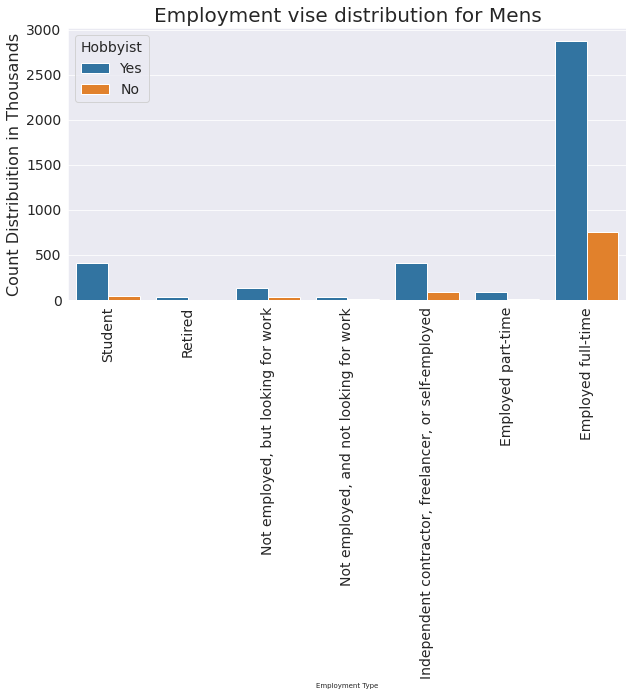

In [75]:
plt.figure(figsize=(10,5))
g = sns.countplot(x=ed_for_man,hue=survey_df.Hobbyist)
g.set_title("Employment vise distribution for Mens", fontsize=20)
g.set_xlabel("Employment Type", fontsize=7)
g.set_ylabel("Count Distribuition in Thousands", fontsize=16)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show();

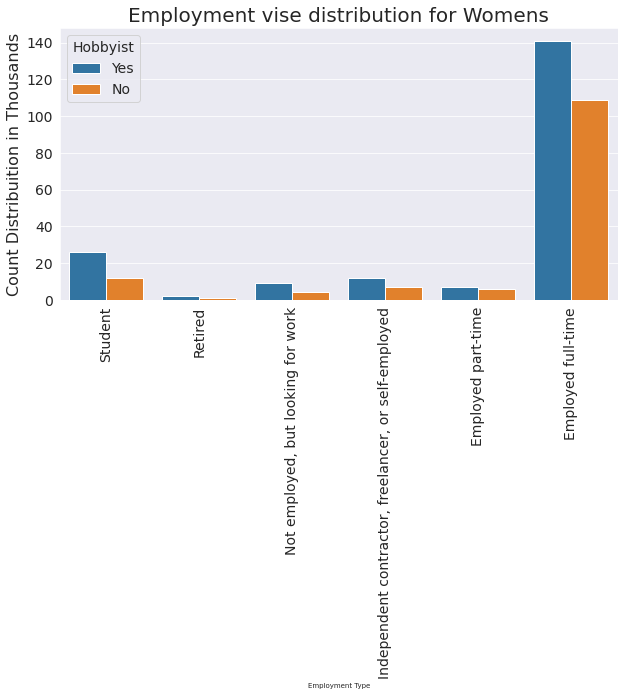

In [76]:
plt.figure(figsize=(10,5))

g = sns.countplot(x=ed_for_Woman1,hue=survey_df.Hobbyist)
g.set_title("Employment vise distribution for Womens", fontsize=20)
g.set_xlabel("Employment Type", fontsize=7)
g.set_ylabel("Count Distribuition in Thousands", fontsize=16)
g.set_xticklabels(g.get_xticklabels(),rotation=90);

It is clear with the above graphs that most of the respondents were Full time Employed

## Let us create a new column Employment Type with values as Enthusiast , Professional and other as below.

In [87]:
survey_df['EmploymentType'] =survey_df.Employment.str.replace('Student','Enthusiast')

In [88]:
survey_df['EmploymentType'] 

survey_df['EmploymentType'] = survey_df['EmploymentType'].replace(['Student','Not employed, but looking for work'],'Enthusiast')

In [89]:
survey_df['EmploymentType'] = survey_df['EmploymentType'].replace(['Employed full-time','Employed part-time','Independent contractor, freelancer, or self-employed'],'Professional')

In [90]:
survey_df['EmploymentType'] = survey_df['EmploymentType'].replace(['Not employed, and not looking for work','Retired'],'Other')

In [91]:
df = survey_df['EmploymentType'].value_counts(dropna=False)

In [92]:
df

Professional    4731
Enthusiast       716
Other             80
NaN               46
Name: EmploymentType, dtype: int64

### We have got value_counts for all three categories


In [93]:
df1 = survey_df.Hobbyist.value_counts(dropna=False)
df1

Yes    4423
No     1126
NaN      24
Name: Hobbyist, dtype: int64

## Lets try to visualize the respodents on basis of their Employment type

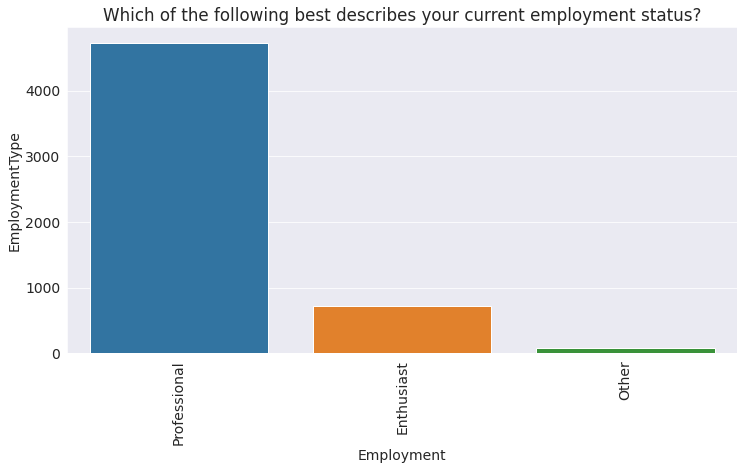

In [94]:
plt.figure(figsize=(12, 6));
plt.title(schema.Employment);
plt.xlabel('Employment');
plt.ylabel('Number of respondents');

g = sns.barplot(y=df,x=df.index);
g.set_xticklabels(g.get_xticklabels(),rotation=90);

## Lets Visualize Employment type with respective to their Ages

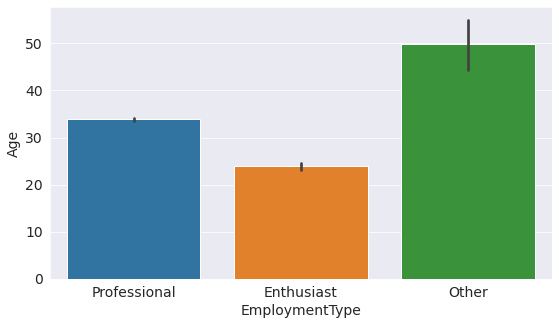

In [95]:
sns.barplot(x=survey_df.EmploymentType,y=survey_df.Age);

## Combine the above visualization with Gender to get a better understanding

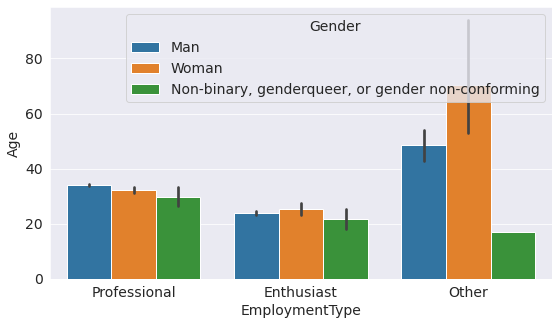

In [96]:
sns.barplot(x=survey_df.EmploymentType,y=survey_df.Age,hue=survey_df.Gender);

Now let us try to analyze considering the 

### The below helper function splits the mulivalued column.

In [104]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [107]:
dev_type_df = split_multicolumn(survey_df.DevType) # split the values in columns and set True and false respectively

In [108]:
dev_type_df.head(3)

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,"Developer, embedded applications or devices","Engineer, data",Educator,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [110]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, full-stack                            2856
Developer, back-end                              2624
Developer, front-end                             1809
Developer, desktop or enterprise applications    1221
Developer, mobile                                 825
DevOps specialist                                 677
Database administrator                            640
System administrator                              569
Designer                                          557
Developer, embedded applications or devices       441
Data or business analyst                          426
Engineer, data                                    413
Developer, QA or test                             382
Data scientist or machine learning specialist     377
Engineering manager                               326
Academic researcher                               300
Developer, game or graphics                       281
Educator                                          274
Product manager             

In [111]:
dev_type_totals
dev_type_totals.index

Index(['Developer, full-stack', 'Developer, back-end', 'Developer, front-end',
       'Developer, desktop or enterprise applications', 'Developer, mobile',
       'DevOps specialist', 'Database administrator', 'System administrator',
       'Designer', 'Developer, embedded applications or devices',
       'Data or business analyst', 'Engineer, data', 'Developer, QA or test',
       'Data scientist or machine learning specialist', 'Engineering manager',
       'Academic researcher', 'Developer, game or graphics', 'Educator',
       'Product manager', 'Engineer, site reliability', 'Scientist',
       'Senior executive/VP', 'Marketing or sales professional'],
      dtype='object')

In [112]:
dev_type_totals_pct = dev_type_totals * 100 / dev_type_totals.sum()

In [103]:
dev_type_totals_pct  # get percentage of all the Dev Types

Developer, full-stack                            17.928437
Developer, back-end                              16.472065
Developer, front-end                             11.355932
Developer, desktop or enterprise applications     7.664783
Developer, mobile                                 5.178908
DevOps specialist                                 4.249843
Database administrator                            4.017577
System administrator                              3.571877
Designer                                          3.496547
Developer, embedded applications or devices       2.768362
Data or business analyst                          2.674200
Engineer, data                                    2.592593
Developer, QA or test                             2.397991
Data scientist or machine learning specialist     2.366604
Engineering manager                               2.046453
Academic researcher                               1.883239
Developer, game or graphics                       1.7639

##  Can you figure out what percentage of respondents work in roles related to data science?

In [121]:
data_science_related = dev_type_df[(dev_type_df["Database administrator"] == True) | (dev_type_df["Data or business analyst"] == True) | (dev_type_df["Data scientist or machine learning specialist"] == True) | (dev_type_df["Engineer, data"] == True)]

In [122]:
data_science_related.shape

(1277, 23)

In [123]:
Percentage_data_roles = data_science_related.shape[0] * 100 / dev_type_df.shape[0]

In [124]:
Percentage_data_roles

22.91404988336623

So We see overall 23% respondents work in Data Science related roles

## Percentage distribution for all the roles

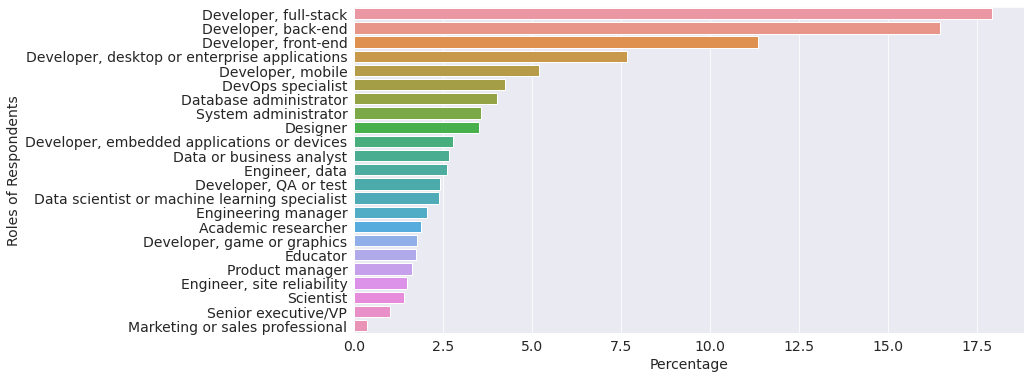

In [125]:
plt.figure(figsize=(12, 6));
sns.barplot(x=dev_type_totals_pct, y=dev_type_totals_pct.index)
plt.ylabel('Roles of Respondents');
plt.xlabel('Percentage');

## Which positions have the highest percentage of women?

In [126]:
merged_df = pd.merge(dev_type_df,survey_df.Gender,left_index=True,right_index= True) #added column Gender to the right

In [127]:
merged_df.head(3)

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,"Developer, embedded applications or devices","Engineer, data",Educator,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional,Gender
0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Man
1,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Man
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5568,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,Man
5569,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,NaN
5570,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,Man
5571,True,True,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Man


In [128]:
merged_df.groupby('Gender').sum()

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,"Developer, embedded applications or devices","Engineer, data",Educator,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
Gender,,,,,,,,,,,,,,,,,,,,,,,
Man,1126,2585,760,497,1631,2382,342,626,262,591,405,371,247,520,297,242,378,267,331,204,147,212,43
"Non-binary, genderqueer, or gender non-conforming",2,16,4,3,9,14,1,3,2,4,2,2,0,4,0,0,1,0,0,1,0,2,1
Woman,38,154,33,33,105,116,20,15,7,26,14,22,15,18,14,5,27,14,23,9,6,9,7


##  Developer , full stack is the role with highest number of women .

In [ ]:
merged_df.groupby('Gender').sum().idxmax(axis=1)  #sum on columns

Gender
Man                                                    Developer, back-end
Non-binary, genderqueer, or gender non-conforming    Developer, full-stack
Woman                                                Developer, full-stack
dtype: object

## Lets Do some analysis on the Age column

In [129]:
survey_df['Age']

0        NaN
1        NaN
2        NaN
3       25.0
4       31.0
        ... 
5568    19.0
5569     NaN
5570    29.0
5571    33.0
5572    18.0
Name: Age, Length: 5573, dtype: float64

## Let us filter out responses by age (or age group)and analyze and compare the survey results for different age groups. 

### Create a new column called AgeGroup containing values like Less than 10 years, 10-18 years, 18-30 years, 30-45 years, 45-60 years and Older than 60 years. 

In [130]:
survey_df['AgeGroup'] = pd.cut(survey_df['Age'], bins=[0,10,18,30,45,60,100], labels=["Less 10 years", "10-18 years", "18-30 years", "30-45 years", "45-60 years" ,"Older than 60 years"], right=False)


In [131]:
Age_grp_count = survey_df['AgeGroup'].value_counts()
Age_grp_count

30-45 years            2063
18-30 years            2032
45-60 years             537
10-18 years             121
Older than 60 years     112
Less 10 years             0
Name: AgeGroup, dtype: int64

In [132]:
survey_df.sample(10)  #Lets see a sample to 10

,Country,Age,Gender,EdLevel,Hobbyist,Employment,DevType,EmploymentType,AgeGroup
1016,Italy,35.0,Man,"Secondary school (e.g. American high school, G...",No,Employed full-time,"Developer, back-end;Developer, full-stack;DevO...",Professional,30-45 years
2613,India,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Yes,Employed full-time,"Developer, back-end;Developer, full-stack;DevO...",Professional,NaN
4710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2917,Brazil,32.0,Man,Primary/elementary school,Yes,Employed full-time,"Developer, full-stack",Professional,30-45 years
1917,Germany,56.0,Woman,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",No,Employed part-time,Database administrator;DevOps specialist;Syste...,Professional,45-60 years
1512,Jordan,29.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Yes,Employed full-time,"Developer, back-end;Developer, desktop or ente...",Professional,18-30 years
46,United Kingdom,53.0,Man,"Other doctoral degree (Ph.D., Ed.D., etc.)",Yes,Employed full-time,Data scientist or machine learning specialist;...,Professional,45-60 years
2791,Canada,28.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",No,Employed full-time,"Developer, QA or test",Professional,18-30 years
799,Israel,40.0,Man,Some college/university study without earning ...,Yes,"Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, desktop or ente...",Professional,30-45 years
2185,United States,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Yes,Employed full-time,Engineering manager,Professional,NaN


## Visualize on AgeGroup

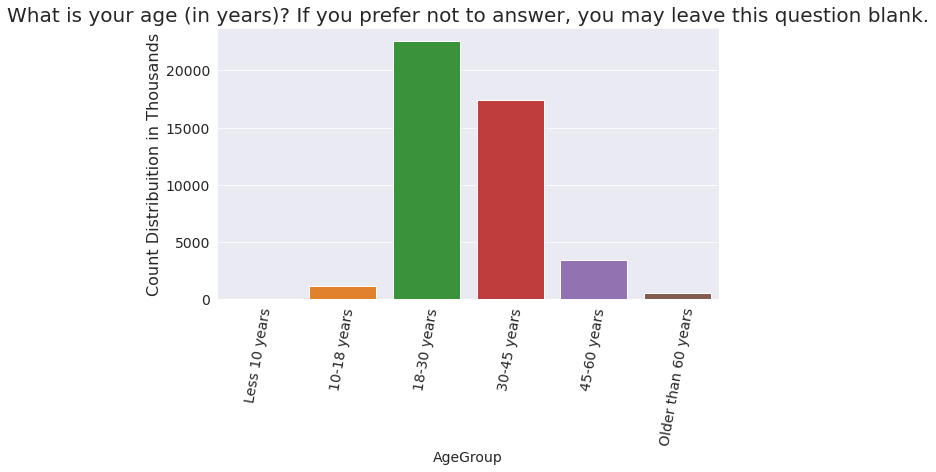

In [ ]:
g = sns.countplot(survey_df['AgeGroup']);

g.set_title(schema.Age, fontsize=20);
g.set_ylabel("Count Distribuition in Thousands", fontsize=16);
g.set_xticklabels(g.get_xticklabels(),rotation=80);

## Get Gender distribution on AgeGroup

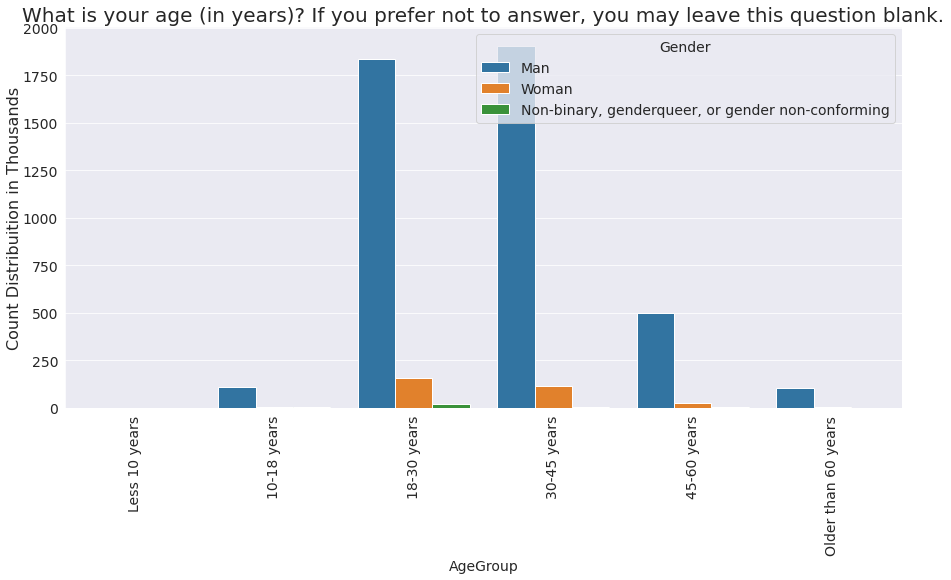

In [135]:
plt.figure(figsize=(15,7));

g=sns.set_style('darkgrid')

g = sns.countplot(survey_df['AgeGroup'],hue = survey_df.Gender,orient='v');

g.set_title(schema.Age, fontsize=20);
g.set_ylabel("Count Distribuition in Thousands", fontsize=16,labelpad=0.3);
g.set_xticklabels(g.get_xticklabels(),rotation=90);



## Lets do some Analysis on Countries of the respondents

In [136]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries


United States         2818
Canada                 481
United Kingdom         264
Germany                207
India                  161
Australia              132
Brazil                 129
France                  85
Poland                  69
Netherlands             61
Italy                   54
Spain                   49
Mexico                  47
Russian Federation      44
Turkey                  44
Name: Country, dtype: int64

## As number of respndents are from Age 18-30 , lets do some more analysis.

In [138]:
temp= survey_df.groupby(['AgeGroup'])
temp1 = temp.get_group(('18-30 years'))[['Gender', 'Country']]

In [139]:
temp1

,Gender,Country
3,Man,Albania
9,Man,United Kingdom
10,Man,United Kingdom
13,Man,United States
16,Man,United States
...,...,...
5563,Man,Philippines
5567,Man,China
5568,Man,Singapore
5570,Man,United States


In [140]:
temp2 = temp1['Country'].value_counts().head(10)
temp2

United States     928
Canada            190
India              96
United Kingdom     88
Germany            73
Brazil             62
France             39
Australia          34
Poland             32
Mexico             23
Name: Country, dtype: int64

## Lets visualize the country vise counts for the Age Group (18-30 years)

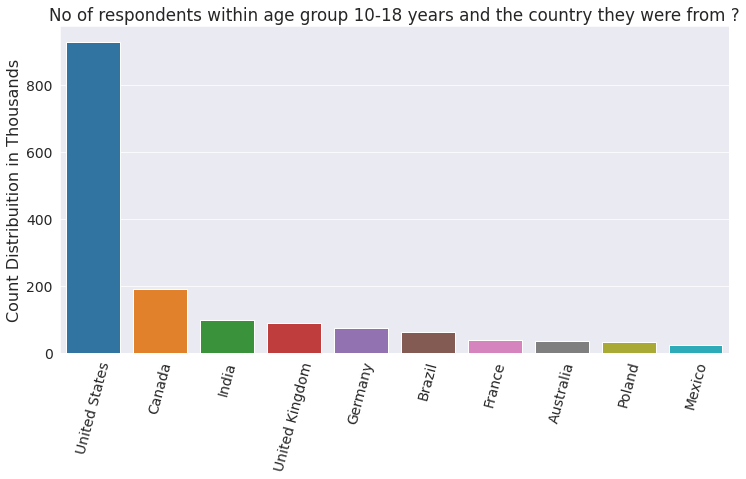

In [141]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('No of respondents within age group 10-18 years and the country they were from ?')
g=sns.barplot(y=temp2,x=temp2.index);
g.set_ylabel("Count Distribuition in Thousands", fontsize=16);

## From above we can see United States hold highest count for Age Group (18 -30)


In [142]:
tem4= survey_df.groupby(['AgeGroup','Country'])

In [143]:
tem4

In [ ]:
### Now Lets try to get Gender distribution.

In [161]:
tem5 = tem4.get_group(('18-30 years','United States'))[['Gender']]

In [162]:
tem6=tem5.value_counts()
tem6

Gender                                           
Man                                                  813
Woman                                                 96
Non-binary, genderqueer, or gender non-conforming     13
dtype: int64

## Gender vise distribution in United States for Age Group(10-18) years.

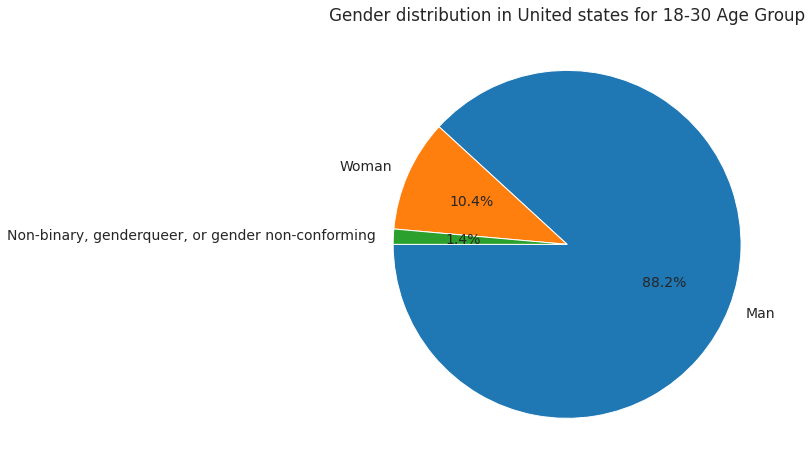

In [165]:
plt.figure(figsize=(18,8))
plt.title('Gender distribution in United states for 18-30 Age Group')
plt.pie(tem6, labels=['Man','Woman','Non-binary, genderqueer, or gender non-conforming'], autopct='%2.1f%%', startangle=180);

# Thank you!

In [ ]:
jovian.submit(assignment="zero-to-pandas-project")

<IPython.core.display.Javascript object>